In [1]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import numpy as np
import cv2

In [2]:
data_folder_path = os.path.join(os.getcwd()[:-9], 'data')
data_folder_path

'c:\\Users\\pstrz\\OneDrive\\Pulpit\\studia\\7 sem\\PZND\\Skimmias-Defects-Segmentation\\data'

In [3]:
images_path = os.path.join(data_folder_path, 'images')
masks_path = os.path.join(data_folder_path, 'masks')

C:\Users\pstrz\AppData\Local\Temp\ipykernel_43032\3143563050.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


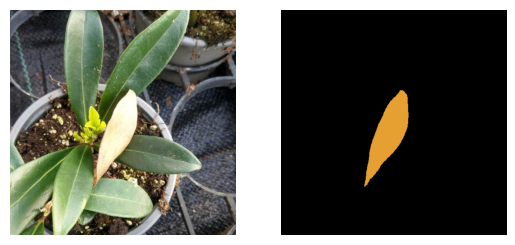

In [4]:
random_image = random.choice(os.listdir(images_path))
random_image

image_path = os.path.join(images_path, random_image)
mask_path = os.path.join(masks_path, random_image[:-4] + '-mask.png')

image = Image.open(image_path)
mask = Image.open(mask_path)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(image)
ax2.imshow(mask)

ax1.axis('off')
ax2.axis('off')

fig.show()

In [5]:
mask = np.asarray(mask)
image = np.asarray(image)

np.unique(mask.reshape(-1, 3))

array([  0,  50, 160, 230], dtype=uint8)

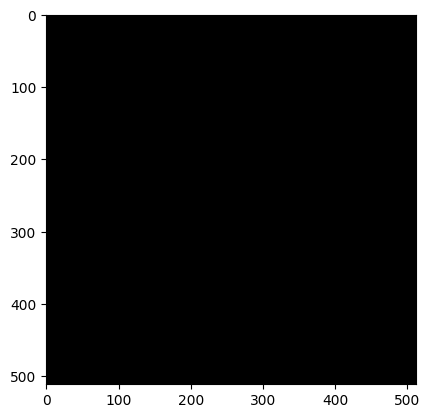

In [6]:
crop_image = np.where(mask == 255, image, 0)
crop_image.shape

plt.imshow(crop_image)

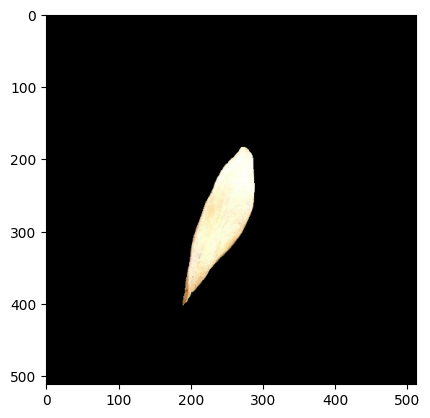

In [7]:
plt.imshow(np.where((mask>0) & (mask<255), image, 0))

In [8]:
images = os.listdir(images_path) 
masks = os.listdir(masks_path)

POGRYZIONE FRAGMENTY KWIATOW

In [19]:
bitten_chunks = []

for i in range(len(images)):
    image_path = os.path.join(images_path, images[i])
    mask_path = os.path.join(masks_path, images[i][:-4] + '-mask.png')

    image = np.asarray(Image.open(image_path))
    mask = np.asarray(Image.open(mask_path))

    bitten_chunks.append(np.where(mask==255, image, 0))

bitten_chunks = np.array(bitten_chunks)



In [20]:
bitten_chunks.shape

(366, 512, 512, 3)

RGB

In [21]:
rgbs = bitten_chunks.reshape(366*512*512, 3)

(array([  2773.,   9235.,  17184.,  26978.,  38574.,  59269.,  93202.,
        149344., 199213., 357471.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

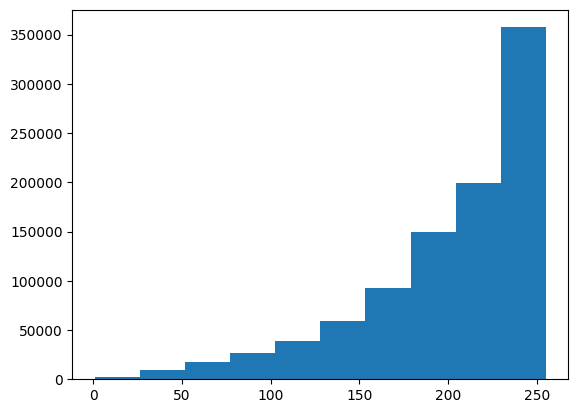

In [22]:
r_channel = rgbs[:,0]

plt.hist(r_channel[r_channel != 0])

(array([  1604.,   5825.,  14100.,  22873.,  35962.,  60502.,  89320.,
        146936., 211667., 364517.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

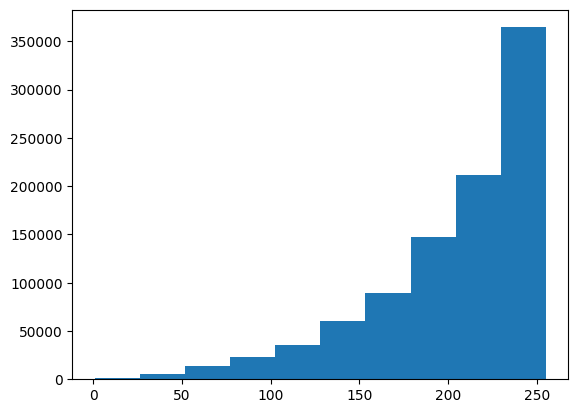

In [23]:
g_channel = rgbs[:,1]

plt.hist(g_channel[g_channel != 0])

(array([  6389.,  14584.,  24497.,  34652.,  47259.,  69343.,  93473.,
        143256., 190984., 328099.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

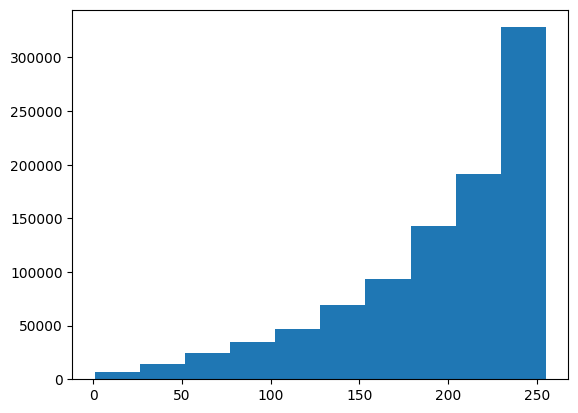

In [24]:
b_channel = rgbs[:,2]

plt.hist(b_channel[b_channel != 0])

HSV

In [25]:
hsv = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2HSV) for img in bitten_chunks])
hsv = hsv.reshape(366*512*512, 3)

In [26]:
hsv.shape

(95944704, 3)

(array([ 96280., 272625., 134456.,  44446.,  41177., 137989., 117325.,
         34638.,  22995.,  28007.]),
 array([  1. ,  18.8,  36.6,  54.4,  72.2,  90. , 107.8, 125.6, 143.4,
        161.2, 179. ]),
 <BarContainer object of 10 artists>)

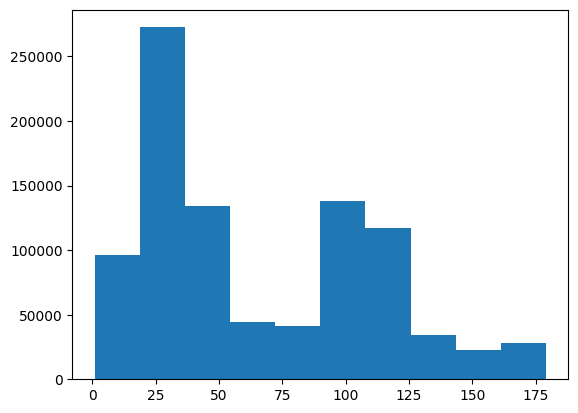

In [27]:
h_channel = hsv[:,0] #od 0 do 180 max
plt.hist(h_channel[h_channel != 0])

(array([548131., 233241.,  90801.,  32458.,  15420.,   7669.,   3643.,
          2055.,    996.,   1249.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

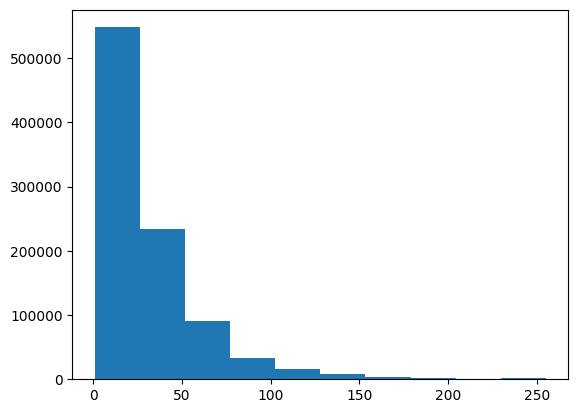

In [28]:
s_channel = hsv[:,1] 
plt.hist(s_channel[s_channel != 0])

(array([  1211.,   5382.,  13360.,  21946.,  32556.,  51893.,  75961.,
        124879., 177910., 448242.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

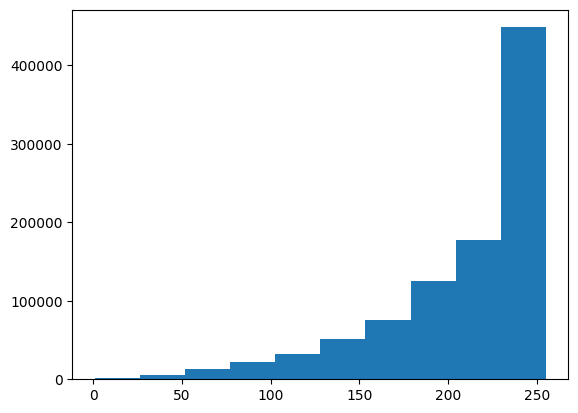

In [ ]:
v_channel = hsv[:,2]
plt.hist(v_channel[v_channel != 0])

SPALONE FRAGMENTY KWIATOW

In [32]:
burned_chunks = []

for i in range(len(images)):
    image_path = os.path.join(images_path, images[i])
    mask_path = os.path.join(masks_path, images[i][:-4] + '-mask.png')

    image = np.asarray(Image.open(image_path))
    mask = np.asarray(Image.open(mask_path))

    burned_chunks.append(np.where(mask==255, image, 0))

burned_chunks = np.array(burned_chunks)

In [33]:
burned_chunks.shape

(366, 512, 512, 3)

In [34]:
rgbs = burned_chunks.reshape(366*512*512, 3)

(array([  2773.,   9235.,  17184.,  26978.,  38574.,  59269.,  93202.,
        149344., 199213., 357471.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

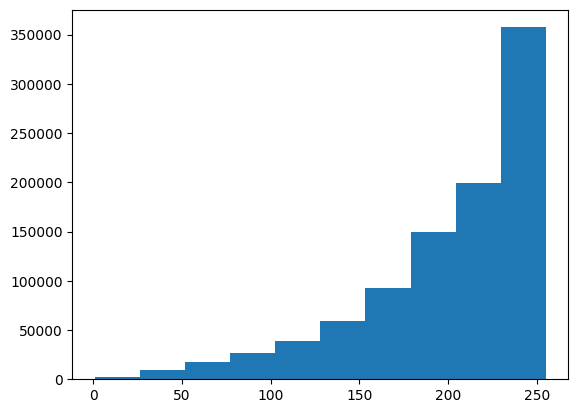

In [35]:
r_channel = rgbs[:,0]

plt.hist(r_channel[r_channel != 0])

(array([  1604.,   5825.,  14100.,  22873.,  35962.,  60502.,  89320.,
        146936., 211667., 364517.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

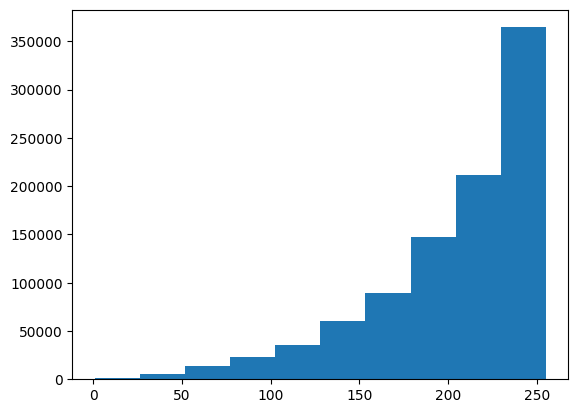

In [36]:
g_channel = rgbs[:,1]

plt.hist(g_channel[g_channel != 0])

(array([  6389.,  14584.,  24497.,  34652.,  47259.,  69343.,  93473.,
        143256., 190984., 328099.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

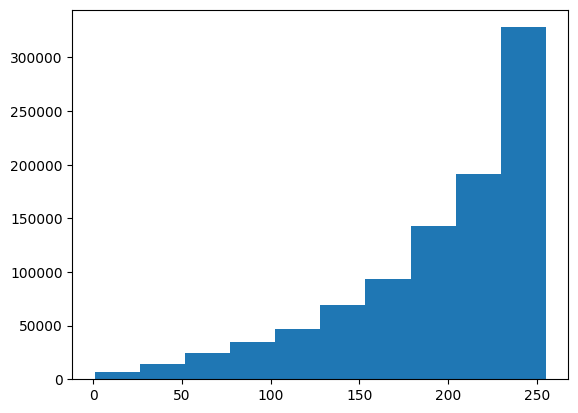

In [37]:
b_channel = rgbs[:,2]

plt.hist(b_channel[b_channel != 0])

HSV

In [41]:
hsv = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2HSV) for img in burned_chunks])
hsv = hsv.reshape(366*512*512, 3)

(array([ 96280., 272625., 134456.,  44446.,  41177., 137989., 117325.,
         34638.,  22995.,  28007.]),
 array([  1. ,  18.8,  36.6,  54.4,  72.2,  90. , 107.8, 125.6, 143.4,
        161.2, 179. ]),
 <BarContainer object of 10 artists>)

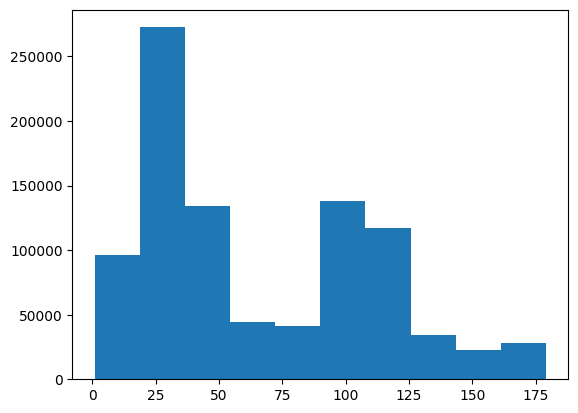

In [42]:
h_channel = hsv[:, 0]

plt.hist(h_channel[h_channel != 0])

(array([548131., 233241.,  90801.,  32458.,  15420.,   7669.,   3643.,
          2055.,    996.,   1249.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

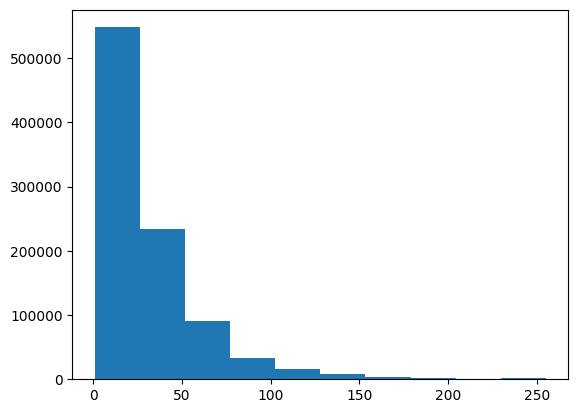

In [45]:
s_channel = hsv[:, 1]

plt.hist(s_channel[s_channel != 0])

(array([  1211.,   5382.,  13360.,  21946.,  32556.,  51893.,  75961.,
        124879., 177910., 448242.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

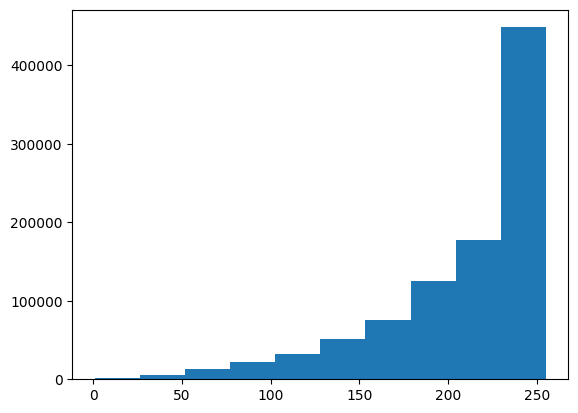

In [46]:
v_channel = hsv[:, 2]

plt.hist(v_channel[v_channel != 0])